# read data

In [1]:
from auto_ml_regression.automl_pipeline import AutoMLPipeline
import pandas as pd

data = pd.read_csv('../../datasets/insurance_dataset/insurance.csv')
target_col="charges"
N_SEGMENTS = 2

cat_features = data.select_dtypes(include='object').columns.to_list()
num_features = data.select_dtypes(exclude='object').columns.to_list()
num_features.remove(target_col)

# init pipeline

In [2]:
# Инициализация
pipeline = AutoMLPipeline(
    num_features=num_features,
    cat_features=cat_features,
    target_col=target_col,
    n_segments=N_SEGMENTS   # Можно указать любое количество сегментов
)

# preprocess data

In [3]:
pipeline.preprocess_data(data)

# segmentation Catboost+K-means

/Users/andrejurkinair/Documents/diploma_practice/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-21 21:50:22,404] A new study created in memory with name: no-name-c42ee5d9-86e8-4a00-9d94-cb19a7e19ea5
[I 2025-05-21 21:50:24,926] Trial 0 finished with value: -10028.508058867106 and parameters: {'depth': 3, 'learning_rate': 0.2685661571566741, 'l2_leaf_reg': 4.875845856992488}. Best is trial 0 with value: -10028.508058867106.
[I 2025-05-21 21:50:25,507] Trial 1 finished with value: -10278.571361929811 and parameters: {'depth': 2, 'learning_rate': 0.2720739172574596, 'l2_leaf_reg': 6.58824917500439}. Best is trial 0 with value: -10028.508058867106.
[I 2025-05-21 21:50:26,085] Trial 2 finished with value: -10431.602939993674 and parameters: {'depth': 2, 'learning_rate': 0.24239833792445162, 

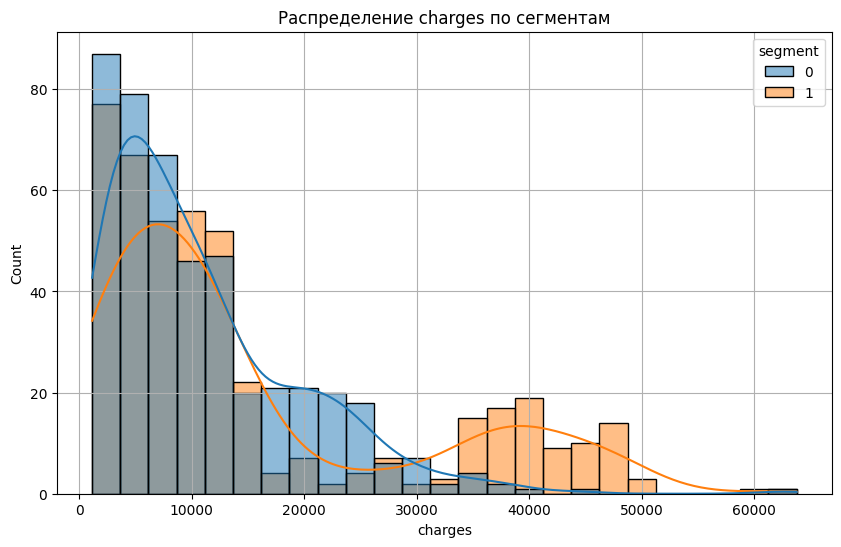

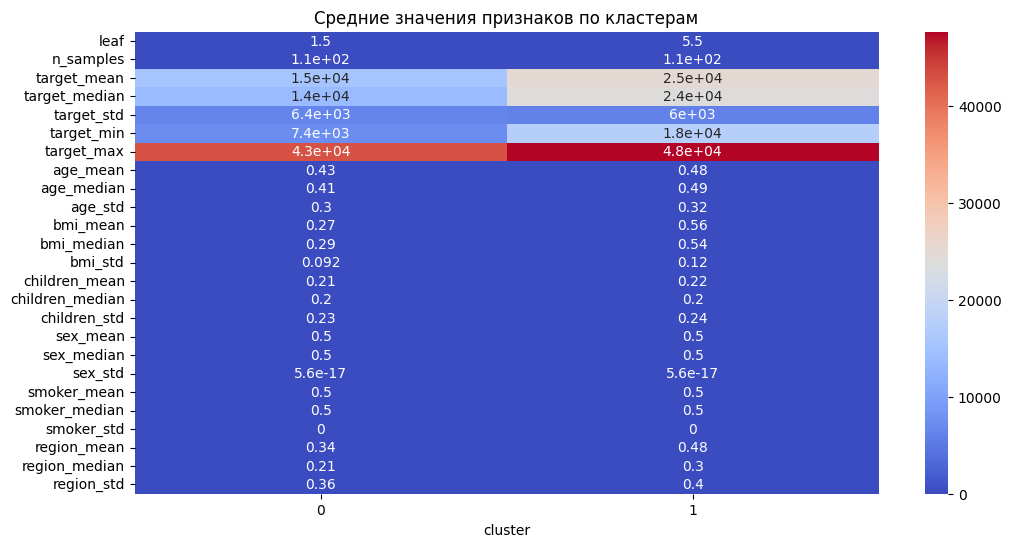

In [4]:
pipeline.segment_data(plot=True)

## classifier

In [5]:
pipeline.train_classifier(n_trials=10)

[I 2025-05-21 21:50:28,790] A new study created in memory with name: no-name-d7884f3c-b4a6-4609-bb3b-d8b751fc57c9
[I 2025-05-21 21:50:29,398] Trial 0 finished with value: 0.9999382716049383 and parameters: {'iterations': 1393, 'learning_rate': 0.0068388881385074264, 'l2_leaf_reg': 0.014737049974846513, 'random_strength': 0.015056616420217104, 'bagging_temperature': 1.4039207739273307, 'border_count': 89, 'min_data_in_leaf': 49, 'leaf_estimation_iterations': 14, 'grow_policy': 'SymmetricTree', 'od_type': 'IncToDec', 'od_wait': 31, 'one_hot_max_size': 34}. Best is trial 0 with value: 0.9999382716049383.
[I 2025-05-21 21:50:29,417] Trial 1 finished with value: 1.0 and parameters: {'iterations': 1251, 'learning_rate': 0.023518685726692592, 'l2_leaf_reg': 0.020219744738625964, 'random_strength': 0.0057408738610130305, 'bagging_temperature': 7.452691049976265, 'border_count': 187, 'min_data_in_leaf': 45, 'leaf_estimation_iterations': 4, 'grow_policy': 'Lossguide', 'od_type': 'Iter', 'od_wait

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       446

    accuracy                           1.00       896
   macro avg       1.00      1.00      1.00       896
weighted avg       1.00      1.00      1.00       896

ROC AUC = 1.0
TEST ROC AUC = 1.0000


## regressions

In [6]:
pipeline.train_regressors(model_type='huber', n_trials=30, cv=4)

[I 2025-05-21 21:50:33,956] A new study created in memory with name: no-name-012a69e1-f810-46dc-ae42-6ac8bf321af9
[I 2025-05-21 21:50:33,978] Trial 0 finished with value: -7317.059345415743 and parameters: {'epsilon': 4.41040503658755, 'alpha': 0.1124409558740421, 'fit_intercept': True}. Best is trial 0 with value: -7317.059345415743.
[I 2025-05-21 21:50:33,997] Trial 1 finished with value: -11413.64293481 and parameters: {'epsilon': 7.189006265661784, 'alpha': 0.2176747269368497, 'fit_intercept': False}. Best is trial 0 with value: -7317.059345415743.
[I 2025-05-21 21:50:34,015] Trial 2 finished with value: -11309.52471922855 and parameters: {'epsilon': 6.442952416043046, 'alpha': 0.1939293198548521, 'fit_intercept': False}. Best is trial 0 with value: -7317.059345415743.
[I 2025-05-21 21:50:34,032] Trial 3 finished with value: -11601.846191978937 and parameters: {'epsilon': 3.059549260826302, 'alpha': 0.28046367580218656, 'fit_intercept': False}. Best is trial 0 with value: -7317.059

In [7]:
pipeline.regressor.get_model_coefs()

,model_coef_segment_0,model_coef_segment_1
intercept_,1378.833796,355.275503
age,11540.611648,12689.532130
bmi,814.145539,3043.015262
children,2022.165706,4196.986966
sex,-305.594048,-543.155517
smoker,13949.773795,32596.696083
region,-565.030675,-68.764228


In [8]:
# test metrics
pipeline.evaluate_test()

,r2,mse,rmse,mae,mape
0,0.84614,2.302939e+07,4798.894519,2345.301309,0.191038


# segmentstion K-means

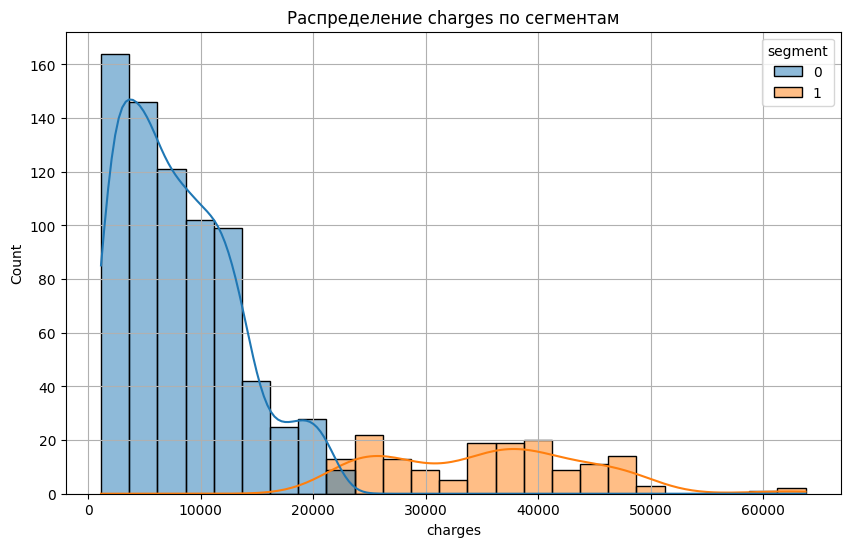

In [9]:
pipeline.segment_data_kmeans(plot=True)

## classifier

In [10]:
pipeline.train_classifier(n_trials=10)

[I 2025-05-21 21:50:35,502] A new study created in memory with name: no-name-a2f9d7a3-47f7-4383-a5fd-e1030c0f5b4e
[I 2025-05-21 21:50:36,479] Trial 0 finished with value: 0.9349662162162162 and parameters: {'iterations': 1542, 'learning_rate': 0.020083212203981078, 'l2_leaf_reg': 0.0014257986978299878, 'random_strength': 0.1419855412377472, 'bagging_temperature': 4.428328489834171, 'border_count': 140, 'min_data_in_leaf': 40, 'leaf_estimation_iterations': 2, 'grow_policy': 'Depthwise', 'od_type': 'IncToDec', 'od_wait': 37, 'one_hot_max_size': 115, 'max_depth': 8}. Best is trial 0 with value: 0.9349662162162162.
[I 2025-05-21 21:50:37,440] Trial 1 finished with value: 0.9272592905405405 and parameters: {'iterations': 1433, 'learning_rate': 0.1050026034039337, 'l2_leaf_reg': 0.015925178398065717, 'random_strength': 0.0025083363257247695, 'bagging_temperature': 8.012872305109287, 'border_count': 136, 'min_data_in_leaf': 77, 'leaf_estimation_iterations': 14, 'grow_policy': 'Depthwise', 'od

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       736
           1       0.99      0.78      0.87       160

    accuracy                           0.96       896
   macro avg       0.97      0.89      0.92       896
weighted avg       0.96      0.96      0.96       896

ROC AUC = 0.9762185801630434
TEST ROC AUC = 0.9081


## regressions

In [11]:
pipeline.train_regressors(model_type='huber', n_trials=30, cv=4)

[I 2025-05-21 21:50:39,430] A new study created in memory with name: no-name-a46b5813-b455-4d05-9235-6c100d213148
[I 2025-05-21 21:50:39,455] Trial 0 finished with value: -4174.9073990611 and parameters: {'epsilon': 4.469206833175257, 'alpha': 0.05594003590779857, 'fit_intercept': True}. Best is trial 0 with value: -4174.9073990611.
[I 2025-05-21 21:50:39,474] Trial 1 finished with value: -7588.110392335118 and parameters: {'epsilon': 5.728832830300823, 'alpha': 0.2653883757564804, 'fit_intercept': False}. Best is trial 0 with value: -4174.9073990611.
[I 2025-05-21 21:50:39,495] Trial 2 finished with value: -7404.44975185039 and parameters: {'epsilon': 4.4790902809701025, 'alpha': 0.22813201831927912, 'fit_intercept': False}. Best is trial 0 with value: -4174.9073990611.
[I 2025-05-21 21:50:39,513] Trial 3 finished with value: -6287.538497276374 and parameters: {'epsilon': 2.745754984651372, 'alpha': 0.11202410612364043, 'fit_intercept': False}. Best is trial 0 with value: -4174.907399

In [12]:
pipeline.regressor.get_model_coefs()

,model_coef_segment_0,model_coef_segment_1
intercept_,1962.571071,13008.491549
age,10864.392619,5445.702762
bmi,873.422445,24967.279688
children,2161.839043,205.367533
sex,-334.785241,916.953894
smoker,12857.061921,8970.353528
region,-350.467074,309.021467


In [13]:
# test metrics
pipeline.evaluate_test()

,r2,mse,rmse,mae,mape
0,0.830973,2.529951e+07,5029.861528,2492.411701,0.194242


# segmentation GMM

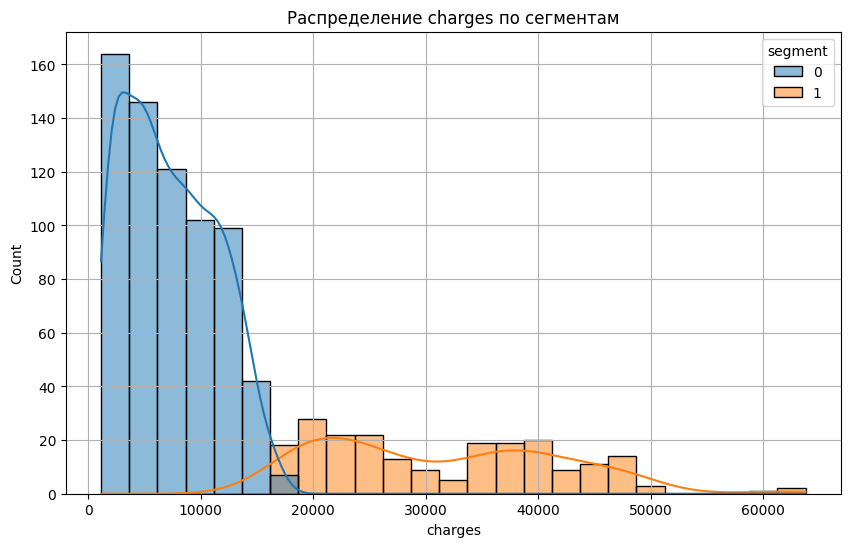

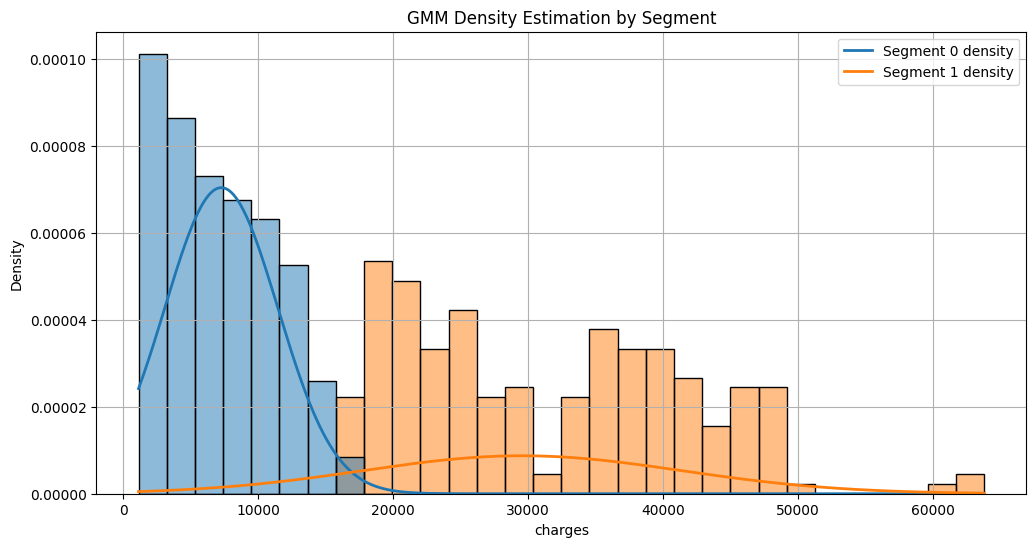

In [14]:
pipeline.segment_data_gmm(plot=True)

## classifier

In [15]:
pipeline.train_classifier(n_trials=10)

[I 2025-05-21 21:50:41,156] A new study created in memory with name: no-name-088e352e-e8c1-41c4-9e25-5cc561baa583
[I 2025-05-21 21:50:41,195] Trial 0 finished with value: 0.9304871838397555 and parameters: {'iterations': 846, 'learning_rate': 0.1303066981860297, 'l2_leaf_reg': 0.0018960716948100346, 'random_strength': 0.0031425035915854265, 'bagging_temperature': 7.851313346989103, 'border_count': 45, 'min_data_in_leaf': 15, 'leaf_estimation_iterations': 15, 'grow_policy': 'SymmetricTree', 'od_type': 'Iter', 'od_wait': 42, 'one_hot_max_size': 164}. Best is trial 0 with value: 0.9304871838397555.
[I 2025-05-21 21:50:41,473] Trial 1 finished with value: 0.9312510609404174 and parameters: {'iterations': 683, 'learning_rate': 0.014514199612325149, 'l2_leaf_reg': 0.015504351188995581, 'random_strength': 0.00802270537056374, 'bagging_temperature': 0.58122053238569, 'border_count': 241, 'min_data_in_leaf': 14, 'leaf_estimation_iterations': 2, 'grow_policy': 'SymmetricTree', 'od_type': 'IncToD

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       681
           1       1.00      0.87      0.93       215

    accuracy                           0.97       896
   macro avg       0.98      0.94      0.96       896
weighted avg       0.97      0.97      0.97       896

ROC AUC = 0.9997985179114162
TEST ROC AUC = 0.8907


## regressions

In [16]:
pipeline.train_regressors(model_type='huber', n_trials=30, cv=4)

[I 2025-05-21 21:50:43,284] A new study created in memory with name: no-name-f40405da-6f52-472a-80ab-5ca73bfe97e5
[I 2025-05-21 21:50:43,308] Trial 0 finished with value: -3539.541406844868 and parameters: {'epsilon': 7.730993112851495, 'alpha': 0.13779947409099078, 'fit_intercept': True}. Best is trial 0 with value: -3539.541406844868.
[I 2025-05-21 21:50:43,327] Trial 1 finished with value: -6018.459459610433 and parameters: {'epsilon': 6.68295008595619, 'alpha': 0.18095007601717078, 'fit_intercept': False}. Best is trial 0 with value: -3539.541406844868.
[I 2025-05-21 21:50:43,345] Trial 2 finished with value: -6561.731034482602 and parameters: {'epsilon': 4.670614323905996, 'alpha': 0.2760046606759484, 'fit_intercept': False}. Best is trial 0 with value: -3539.541406844868.
[I 2025-05-21 21:50:43,370] Trial 3 finished with value: -2265.3860441945326 and parameters: {'epsilon': 7.35078872690674, 'alpha': 0.01528904714883802, 'fit_intercept': True}. Best is trial 3 with value: -2265.

In [17]:
pipeline.regressor.get_model_coefs()

,model_coef_segment_0,model_coef_segment_1
intercept_,1322.595971,11759.414660
age,12102.518561,8102.859774
bmi,99.402281,20879.651185
children,2030.565574,314.347220
sex,-393.557534,402.250090
smoker,12457.270902,8195.657686
region,-400.385667,-122.210310


In [18]:
# test metrics
pipeline.evaluate_test()

,r2,mse,rmse,mae,mape
0,0.78864,3.163580e+07,5624.571125,2947.704723,0.176287
